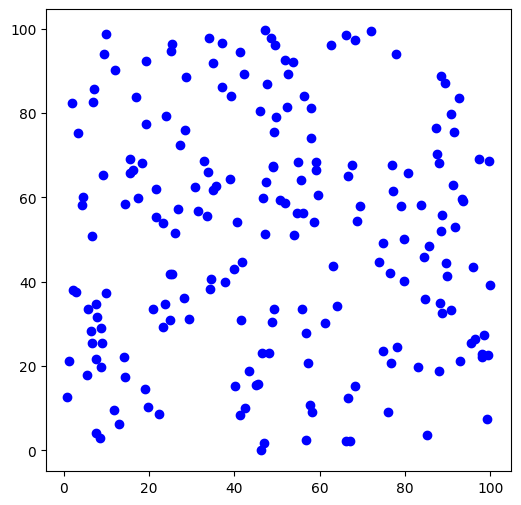

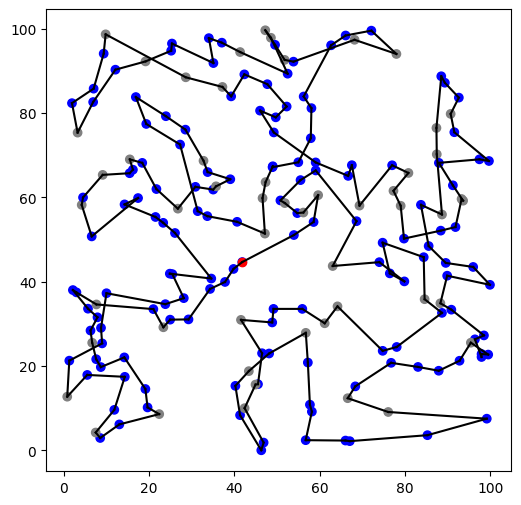

Generation 0: Best fitness = 69536.0 Mutation rate 0.1
Generation 10: Best fitness = 69536.0 Mutation rate 0.40455577357079076
Generation 20: Best fitness = 69536.0 Mutation rate 0.8137061629162322
Generation 30: Best fitness = 69536.0 Mutation rate 0.8137061629162322
Generation 40: Best fitness = 69536.0 Mutation rate 0.8137061629162322
Generation 50: Best fitness = 69536.0 Mutation rate 0.8137061629162322
Generation 60: Best fitness = 69377.0 Mutation rate 0.11499999999999999
Generation 70: Best fitness = 69377.0 Mutation rate 0.46523913960640934
Generation 80: Best fitness = 69112.0 Mutation rate 0.15208749999999996
Generation 90: Best fitness = 69112.0 Mutation rate 0.6152787621294763
Generation 100: Best fitness = 69112.0 Mutation rate 0.8137061629162322
Generation 110: Best fitness = 69112.0 Mutation rate 0.8137061629162322
Generation 120: Best fitness = 69112.0 Mutation rate 0.8137061629162322
Generation 130: Best fitness = 69112.0 Mutation rate 0.8137061629162322
Generation 140

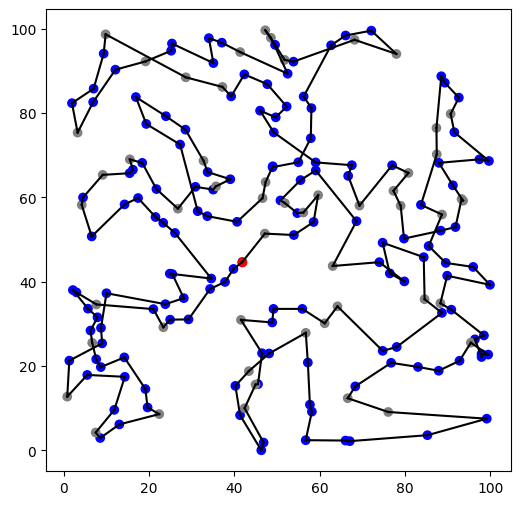

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…


Total distance (Greedy algorithm) :
 1315

Total distance (Genetic algorithm) :
 1298.0

Number of closed towns crossed (Greedy algorithm) :
 52

Number of closed towns crossed (Genetic algorithm) :
 52

Total execution time :
 44.55 seconds
Algorithm verified by the certificate algorithm !


In [6]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets


# Generates time windows
def createTimeWindows(N):
    time_windows = {}
    for i in range(N):
        a = random.randrange(0, time_windows_range, 10)
        b = random.randrange(0, time_windows_range, 10)
        while a == b:
            b = random.randrange(0, time_windows_range, 10)

        time_windows[i] = [min(a, b), max(a, b)]

    return time_windows


# Generates the graph
def createGraphComplex(N):    
    # Randomly generates the coordinates of points in 2D space
    coordinates = 100*np.random.rand(N, 2)

    # Calculates the adjacency matrix from the coordinates
    matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            matrix[i, j] = np.round(np.linalg.norm(coordinates[i] - coordinates[j]))
    
    np.fill_diagonal(matrix, 0)
    matrix = matrix.astype(int)

    return matrix, coordinates


# Displays a graph with the points corresponding to the cities
def plotGraph(coordinates):
    plt.figure(figsize=(6, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')
    plt.show()
 

# Displays the paths traversed on the graph
def plotPath(coordinates, path, closed_visited=[]):
    colors = ['gray' if i in closed_visited else 'blue' for i in range(len(coordinates))]
    # Initialise the route
    plt.figure(figsize=(6, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color=colors)
    
    # Starting point in red
    plt.scatter(coordinates[path[0], 0], coordinates[path[0], 1], color='red')

    # Draw the edges
    for i in range(len(path) - 1):
        start = coordinates[path[i]]
        end = coordinates[path[i + 1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'k-')

    plt.show()


# Animation showing the path taken by the genetic algorithm for each generation
def plotFunc(i):
    # Taking the path of generation i
    path = generation_best_solution_list[i]
    
    # Initialise the route
    plt.figure(figsize=(6, 6))
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='blue')
    
    # Starting point in red
    plt.scatter(coordinates[path[0], 0], coordinates[path[0], 1], color='red')
    
    # Trace the path
    for j in range(len(path) - 1):
        start = coordinates[path[j]]
        end = coordinates[path[j + 1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], 'k-')
    
    plt.show()


# Modifies the weighting of the graph to simulate traffic
def weightChange(total_distance, original_distance, max_time_window):
    changed_distance = (original_distance*(-(total_distance/(max_time_window^2))+total_distance/max_time_window+1))//1
    return changed_distance


# Calculates the total distance of a path
def calculateDistance(matrix, path, use=False):
    if(use):
        total_distance = 0
        closed_visited = []

        for i in range(len(path) - 2):
            distance = weightChange(total_distance, matrix[path[i]][path[i + 1]], time_windows_range)
            #Si on arrive avant fermeture et avant ouverture
            if(timeWindows[i+1][1] <= total_distance + distance and timeWindows[i+1][0] > total_distance + distance):
                #Ajout de l'attente
                distance += timeWindows[i+1][0] - (total_distance + distance)
            elif(timeWindows[i+1][1] < total_distance + distance):
                closed_visited.append(i+1)
            total_distance += distance

        return [total_distance, closed_visited]

    else:
        total_distance = 0

        for i in range(len(path) - 1):
            total_distance += matrix[path[i]][path[i + 1]]

        return total_distance

# Certificate algorithm
def certificateAlgorithm(matrix, cycle):
    # Check whether the list of points is a permutation of all the nodes
    n = len(matrix)
    if cycle[0] == cycle[len(cycle)-1]:
        for i in range(n):
            if i not in cycle:
                print(i, " is not in the cycle")
                return False
    else:
        print("The start and finish are not the same (", cycle[0], "et", cycle[n-1], ")")
        return False
    print("Algorithm verified by the certificate algorithm !")
    return True


# Generates an initial solution (nearest neighbour method)
def nearestNeighbour(matrix, N):    
    # Choose a starting town at random
    start_city = np.random.randint(N)
    
    # Create a list to store the path and add the starting town
    path = [start_city]
    
    # Create a set to store the towns visited
    visited_cities = set([start_city])
    
    # Repeat until all cities have been visited
    while len(visited_cities) < N:
        current_city = path[-1]
        
        # Create a copy of the matrix for the current line and set it to a very large value for towns already visited
        distances = np.copy(matrix[current_city])
        for city in visited_cities:
            distances[city] = np.iinfo(np.int32).max
        
        # Find the nearest unvisited town
        nearest_city = np.argmin(distances)
        
        # Add this town to the route and to all the towns visited
        path.append(nearest_city)
        visited_cities.add(nearest_city)
    
    # Add the starting town to the end of the path to form a cycle
    path.append(start_city)
    return path


# Generates an initial solution (nearest insertion method)
def nearestInsertion(matrix, N):
    # Choose a starting town at random
    start_city = np.random.randint(N)

    # Create a list to store the path and add the starting town
    path = [start_city, start_city]

    # Create a set to store the towns visited
    visited_cities = set([start_city])

    while len(visited_cities) < N:
        nearest_city = None
        nearest_distance = np.inf

        # For each city not visited
        for city in range(N):
            if city in visited_cities:
                continue

            # Find the nearest town to the path
            min_distance_to_path = np.inf
            for visited_city in visited_cities:
                distance = matrix[visited_city][city]
                if distance < min_distance_to_path:
                    min_distance_to_path = distance

            if min_distance_to_path < nearest_distance:
                nearest_distance = min_distance_to_path
                nearest_city = city

        # Insert the nearest town at the best position in the path
        best_insertion_index = None
        best_insertion_cost = np.inf
        for i in range(1, len(path)):
            insertion_cost = matrix[path[i-1]][nearest_city] + matrix[nearest_city][path[i]] - matrix[path[i-1]][path[i]]
            if insertion_cost < best_insertion_cost:
                best_insertion_cost = insertion_cost
                best_insertion_index = i

        # Insert the city in the path
        path.insert(best_insertion_index, nearest_city)

        # Add city to visited cities
        visited_cities.add(nearest_city)

    return path


# Generates a first solution (Farthest insertion method)
def furthestInsertion(matrix, N):
    # Choose a starting town at random
    start_city = np.random.randint(N)

    # Create a list to store the path and add the starting town
    path = [start_city, start_city]

    # Create a set to store the towns visited
    visited_cities = set([start_city])

    while len(visited_cities) < N:
        furthest_city = None
        furthest_distance = -np.inf

        # For each city not visited
        for city in range(N):
            if city in visited_cities:
                continue

            # Find the town furthest from the road
            min_distance_to_path = np.inf
            for visited_city in visited_cities:
                distance = matrix[visited_city][city]
                if distance < min_distance_to_path:
                    min_distance_to_path = distance

            if min_distance_to_path > furthest_distance:
                furthest_distance = min_distance_to_path
                furthest_city = city

        # Insert the furthest town at the best position in the path
        best_insertion_index = None
        best_insertion_cost = np.inf
        for i in range(1, len(path)):
            insertion_cost = matrix[path[i-1]][furthest_city] + matrix[furthest_city][path[i]] - matrix[path[i-1]][path[i]]
            if insertion_cost < best_insertion_cost:
                best_insertion_cost = insertion_cost
                best_insertion_index = i

        # Insert the city in the path
        path.insert(best_insertion_index, furthest_city)

        # Add city to visited cities
        visited_cities.add(furthest_city)

    return path


# Generates an initial solution (Best fit method)
def bestInsertion(matrix, N):
    # Choose a starting town at random
    start_city = np.random.randint(N)

    # Create a list to store the path and add the starting town
    path = [start_city, start_city]

    # Create a set to store the towns visited
    visited_cities = set([start_city])

    while len(visited_cities) < N:
        best_insertion_cost = np.inf
        best_insertion_index = None
        best_city = None

        # For each city not visited
        for city in range(N):
            if city in visited_cities:
                continue

            # Try to insert the city at every possible position on the existing path and keep the best insertion.
            for i in range(1, len(path)):
                insertion_cost = matrix[path[i-1]][city] + matrix[city][path[i]] - matrix[path[i-1]][path[i]]
                if insertion_cost < best_insertion_cost:
                    best_insertion_cost = insertion_cost
                    best_insertion_index = i
                    best_city = city

        # Insert the city in the path
        path.insert(best_insertion_index, best_city)

        # Add city to visited cities
        visited_cities.add(best_city)

    return path


# Generates a new solution, or refines an existing one (Genetic Algorithm)
def geneticAlgorithm(matrix, initial_path, population_PRE, population_RAND, generations, tournament_size, crossover_rate, use_timewindows, num_elites):
    global best_fitness
    # Initialise the population
    population = initializePopulation(initial_path, population_PRE, population_RAND)
    fitness = calculateFitness(matrix, population, use_timewindows)
    generation_best_solution_list = []
    generation_last_best_solution = []

    # Run the algorithm for a certain number of generations
    temp_fitness = np.int32.max
    for generation in range(generations):
        if(temp_fitness != min(fitness)):
            temp_fitness = min(fitness)
            evolutive_mutation_rate = mutation_rate
        else:
            if(evolutive_mutation_rate < 0.8):
                evolutive_mutation_rate *= 1.15
        if generation%10 == 0:
            print(f"Generation {generation}: Best fitness = {min(fitness)} Mutation rate {evolutive_mutation_rate}")
        
        # Sorts the population according to fitness and takes the desired number of elites
        sorted_indices = np.argsort(fitness)
        elites = [population[i] for i in sorted_indices[:num_elites]]

        # Selects and cross-references pairs of parents
        offspring = []
        for _ in range(len(population) - num_elites):
            if np.random.random() < crossover_rate:
                parent1 = population[tournamentSelection(population, fitness, tournament_size)].copy()
                parent2 = population[tournamentSelection(population, fitness, tournament_size)].copy()
                child = orderedCrossover(parent1, parent2)
            else :
                child = population[_]
            offspring.append(child)
        
        # Apply the mutation to children
        for i in range(len(offspring)):
            offspring[i] = mutation(offspring[i], mutation_rate)

        # Add the elites to the children to form the new population
        population = elites + offspring
        fitness = calculateFitness(matrix, population, use_timewindows)
        
        _ = population[np.argmin(fitness)]
        if _ != generation_last_best_solution:
            generation_best_solution_list.append(_)
            generation_last_best_solution = _

    # Returns the best solution for the final population
    best_solution = population[np.argmin(fitness)]
    return best_solution, generation_best_solution_list


# Initialise the population
def initializePopulation(initial_path, population_PRE, population_RAND):
    # Generates random paths
    random_paths = []

    # Pre-fill the list at x% (x being a global variable) with the path generated by the VLPP
    for _ in range(round(population_PRE)):
        random_paths.append(initial_path)

    # Adds random paths that start and end in the same town
    for _ in range(population_RAND):
        temp = initial_path.copy()
        temp.pop(0)
        temp.pop(len(temp)-1)
        random.shuffle(temp)
        temp.insert(0,initial_path[0])
        temp.append(initial_path[0])
        random_paths.append(temp)

    return random_paths


# Calculates the fitness of each path in the population
def calculateFitness(matrix, population, use_timewindows):
    if use_timewindows:
        fitness = [calculateDistance(matrix, path,True)[0]*(len(calculateDistance(matrix, path,True)[1])+1) for path in population]
    else:
        fitness = [calculateDistance(matrix, path) for path in population]
    return fitness


# Determines the best solution within a tournament
def tournamentSelection(population, fitness, tournament_size):
    # Selects a solution for reproduction using tournament selection
    selected = [np.random.choice(len(population)) for _ in range(tournament_size)]
    return min(selected, key=lambda x: fitness[x])


# Produces an ordered cross between two parents
def orderedCrossover(parent1, parent2):
    # We remove the start and finish points, which must remain constant
    N = len(parent1)-2
    startend = parent1[0]
    parent1.pop(0)
    parent1.pop(len(parent1)-1)
    parent2.pop(0)
    parent2.pop(len(parent2)-1)
    
    # Selects a subset of the first parent
    start, end = sorted(np.random.choice(N, 2, replace=False))
    child = [None]*start + parent1[start:end] + [None]*(N-end)

    # Fills in the missing cities in the order in which they appear in the second parent
    for city in parent2:
        if city not in child:
            for i in range(N):
                if child[i] is None:
                    child[i] = city
                    break

    # Add the first city at the end to form a cycle
    child.insert(0, startend)
    child.append(startend)
    return child


# Performs mutations on solutions
def mutation(path, mutation_rate):
    # Copy the path and remove the first and last points
    tempPath = path.copy()
    tempPath.pop(0)
    tempPath.pop(len(tempPath)-1)

    N = len(tempPath)

    # Each mutation has a 25% chance of being selected
    mutation_type = np.random.choice(["swap", "insert", "scramble", "near_swap"], p=[0.25, 0.25, 0.25, 0.25])

    if np.random.random() < mutation_rate:
        # Mutation Swap
        if mutation_type == "swap":
            i, j = np.random.randint(0, N, 2)
            tempPath[i], tempPath[j] = tempPath[j], tempPath[i]
        # Mutation Insertion
        elif mutation_type == "insert":
            i, j = np.random.randint(0, N, 2)
            city = tempPath.pop(i)
            tempPath.insert(j, city)
        # Mutation Scramble
        elif mutation_type == "scramble":
            i, j = sorted(np.random.choice(range(N), 2, replace=False))
            segment = tempPath[i:j+1]
            np.random.shuffle(segment)
            tempPath[i:j+1] = segment
        # Mutation Near Swap
        elif mutation_type == "near_swap":
            i = np.random.randint(0, N)
            j = (i+1) % N 
            tempPath[i], tempPath[j] = tempPath[j], tempPath[i]

    # Re-adding the first and last points
    tempPath.insert(0, path[0])
    tempPath.append(path[0])

    return tempPath


# Inserts offspring into the population
def insertOffspring(population, fitness, offspring, offspring_fitness):
    # Insert the descendants into the population, replacing the worst solutions
    combined_population = population + offspring[:len(population)]
    combined_fitness = fitness + offspring_fitness[:len(population)]

    # Sort solutions by fitness
    sorted_indices = np.argsort(combined_fitness)
    
    # Select the best solutions
    new_population = [combined_population[i] for i in sorted_indices[:len(population)]]
    new_fitness = [combined_fitness[i] for i in sorted_indices[:len(population)]]
    
    return new_population, new_fitness


# Specifies an existing solution (Algorithm 3-OPT)
def threeOptAlgorithm(matrix, path, opt_iterations, use_timewindows):    
    start_node = path[0]
    path = path[1:-1] 

    for _ in range(opt_iterations):
        min_distance = calculateDistance(matrix, [start_node] + path + [start_node], use_timewindows)
        print("Iteration:", _)

        for i in range(len(path)):
            for j in range(i + 2, len(path)):
                for k in range(j + 2, (len(path) + i - 1) % len(path)):
                    new_path = path[i:j][::-1] + path[j:k][::-1] + path[k:i][::-1]
                    new_path = new_path + path[len(new_path):]
                    new_distance = calculateDistance(matrix, [start_node] + new_path + [start_node], use_timewindows)

                    if new_distance < min_distance:
                        path = new_path
                        min_distance = new_distance

    return [start_node] + path + [start_node]



#################### Calling functions ####################
# General settings
N = 200 # Number of vertices (number of towns)
use_timewindows = True # Using time windows
use_GEN = True # Using the genetic algorithm
use_3OPT = False # Using the 3-OPT algorithm
show_graphs = True # Displaying graphs or not

# Parameter generation of the initial solution (gluttonous methods)
use_VLPP = False # Using the nearest neighbour method
use_CI = True # Using the Nearest Insertion method
use_FI = False # Using the Farthest Insertion method
use_BI = False # Using the Best Insertion method

# Genetic algorithm parameters
population_PRE = 1 # Number of VLPP solutions (set to 0 for a solution using the genetic algorithm only)
population_RAND = 99 # Number of randomly generated solutions
generations = 500 # Number of generations
tournament_size = 5 # Tournament size
mutation_rate = 0.1 # Mutation rate
evolutive_mutation_rate = mutation_rate # Mutation rate for the adaptative mutation
crossover_rate = 0.7 # Pemutation rate
num_elites = 3 # Elite number

# 3-OPT algorithm parameters
opt_iterations = 10 # Iterations number

# Time windows parameters
time_windows_range = 1440 # Time windows range (in minutes)


#1. Generating the graph
matrix, coordinates = createGraphComplex(N)
if show_graphs:
    plotGraph(coordinates)

#2. Algorithme Glouton
timeWindows = createTimeWindows(N)
start_time = time.time()
if use_VLPP:
    glouton_path = nearestNeighbour(matrix, N)
elif use_CI:
    glouton_path = nearestInsertion(matrix, N)
elif use_FI:
    glouton_path = furthestInsertion(matrix, N)
elif use_BI:
    glouton_path = bestInsertion(matrix, N)
end_time = time.time()
glouton_time = end_time - start_time
if show_graphs:
    plotPath(coordinates, glouton_path, calculateDistance(matrix, glouton_path, True)[1])
total_distance_VLPP = calculateDistance(matrix,glouton_path)

#3. Genetic algorithm
execution_time_GEN = 0
same_fitness_count = 0
best_fitness = 0
if use_GEN:
    start_time = time.time()
    gen_path, generation_best_solution_list = geneticAlgorithm(matrix, glouton_path, population_PRE, population_RAND, generations, tournament_size, crossover_rate, use_timewindows, num_elites)
    end_time = time.time()
    execution_time_GEN = end_time - start_time
    if(use_timewindows):
        total_distance_GEN = calculateDistance(matrix, gen_path, use_timewindows)[0]
    else:
        total_distance_GEN = calculateDistance(matrix, gen_path)
    if show_graphs:
        plotPath(coordinates, gen_path, calculateDistance(matrix, gen_path, True)[1])
        widgets.interact(plotFunc, i=widgets.IntSlider(min=0, max=len(generation_best_solution_list)-1, step=1, value=0))

#4. 3-OPT algorithm
execution_time_OPT = 0
if use_3OPT:
    start_time = time.time()
    if use_GEN:
        opt3_path = threeOptAlgorithm(matrix, gen_path, opt_iterations, use_timewindows)
    else:
        opt3_path = threeOptAlgorithm(matrix, glouton_path, opt_iterations, use_timewindows)
    end_time = time.time()
    execution_time_OPT = end_time - start_time
    if show_graphs:
        plotPath(coordinates, opt3_path, calculateDistance(matrix, opt3_path, True)[1])
    if(use_timewindows):
        total_distance_OPT = calculateDistance(matrix, opt3_path, use_timewindows)[0]
    else:
        total_distance_OPT = calculateDistance(matrix, opt3_path)

#5. Printing results
print("\nTotal distance (Greedy algorithm) :\n", total_distance_VLPP)
if use_GEN:
    print("\nTotal distance (Genetic algorithm) :\n", total_distance_GEN)
if use_3OPT:
    print("\nTotal distance (3-OPT algorithm) :\n", total_distance_OPT)

if use_timewindows:
    print("\nNumber of closed towns crossed (Greedy algorithm) :\n", len(calculateDistance(matrix, glouton_path,True)[1]))
    if use_GEN :
        print("\nNumber of closed towns crossed (Genetic algorithm) :\n", len(calculateDistance(matrix, gen_path, True)[1]))
    if use_3OPT:
        print("\nNumber of closed towns crossed (3-OPT algorithm) :\n", len(calculateDistance(matrix, opt3_path, True)[1]))
print("\nTotal execution time :\n {:.2f} seconds".format(execution_time_GEN+glouton_time+execution_time_OPT))

if use_3OPT:
    certificateAlgorithm(matrix, opt3_path)   
elif use_GEN:
    certificateAlgorithm(matrix, gen_path)
else:
    print("No path available for certificate algorithm.")